# FEMA DATA ANLYSIS

### Imports

In [55]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import math
import seaborn as sns
import path

In [2]:
# Access Disaster Declaation Summary Data from FEMA
# Total size - 65149
# url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$top=10000"
# disasterDeclarationSummaries=requests.get(url)
# disasterDeclarationSummariesJson = disasterDeclarationSummaries.json()

## FEMA Disaster Declaration Dataset (Dataset 1)

### Defined Functions (FEMA API Call Functionality)

In [3]:
# Defines function to count available records
def getRecordCount(url):
    linecountReq = url+"$inlinecount=allpages&$select=id&$top=1"
    print('URL #',linecountReq)
    linecountRes = requests.get(linecountReq)
    if (linecountRes.status_code == 200) :
        linecountJson = linecountRes.json()
        linecount = linecountJson["metadata"]["count"]
        return linecount

In [4]:
# Creates function to run loop of API calls
def getDelcationSummaryDataFrame(baseUrl, disasterDeclarationSummariesDataFrame, loopNum, top):
    i=0
    skip=0
    while(i<loopNum):
        disasterDeclationSummaryURL = baseUrl + "&$metadata=off&$format=jsona&$skip=" + str(skip) + "&$top=" + str(top)
        disasterDeclationSummaryResponse = requests.get(disasterDeclationSummaryURL)
        if(disasterDeclationSummaryResponse.status_code==200):
            disasterDeclarationSummariesJson = disasterDeclationSummaryResponse.json()
            disasterDF=pd.DataFrame(disasterDeclarationSummariesJson)
            disasterDeclarationSummariesDataFrame=pd.concat([disasterDeclarationSummariesDataFrame, disasterDF])
            print("Success! Number of records #  ", disasterDeclarationSummariesDataFrame.shape)
            skip+=top
        else:
            print("Failed")
        i+=1
    return disasterDeclarationSummariesDataFrame

### FEMA API Call (Dataset 1)

In [5]:
baseUrl = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?"
top = 10000

In [6]:
# Checks for total number of records available to call
linecount = getRecordCount(baseUrl)
print(linecount)

URL # https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$inlinecount=allpages&$select=id&$top=1
65160


In [7]:
# Calculates how many API call loops needed to import all records (10,000 record limit per API call)
print(" Line Count :", linecount)
print(" Top : ",top)
loopNum= math.ceil(linecount/top)
print(" Number of Loops : ",loopNum)

 Line Count : 65160
 Top :  10000
 Number of Loops :  7


In [8]:
# Creates dataframe to hold API data
disasterDeclarationSummariesDataFrame = pd.DataFrame()

#API call to FEMA disaster data
disasterDeclarationSummariesDataFrame = getDelcationSummaryDataFrame(baseUrl, disasterDeclarationSummariesDataFrame, loopNum, top)
print(" SIZE OF DATAFRAME : ", disasterDeclarationSummariesDataFrame.shape)
disasterDeclarationSummariesDataFrame.head()

Success! Number of records #   (10000, 25)
Success! Number of records #   (20000, 25)
Success! Number of records #   (30000, 25)
Success! Number of records #   (40000, 25)
Success! Number of records #   (50000, 25)
Success! Number of records #   (60000, 25)
Success! Number of records #   (65160, 25)
 SIZE OF DATAFRAME :  (65160, 25)


,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,False,False,...,False,44,009,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,None,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
1,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,False,False,...,False,20,201,99201,Washington (County),23038,None,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
2,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,009,99009,Baca (County),23081,None,2023-10-02T19:21:20.859Z,44d903d3d79b5295f58aefdd35682a8d3011644d,fe1befa2-d7ac-4400-b430-36bf30ac9a15
3,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,061,99061,Kiowa (County),23081,None,2023-10-02T19:21:20.859Z,ecfd4777766336e18a46d1eb231fc25922f8b014,880f5941-94fb-4c00-afb8-2f1e32fe1b5b
4,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,099,99099,Prowers (County),23081,None,2023-10-02T19:21:20.859Z,90ab966409613986143ee242870748e8d19aa525,875a66ca-6234-423a-9e92-3626484e11d6


### Dataset 1 Exploration

In [9]:
# Shows names of dataframe columns 
disasterDeclarationSummariesDataFrame.columns

Index(['femaDeclarationString', 'disasterNumber', 'state', 'declarationType',
       'declarationDate', 'fyDeclared', 'incidentType', 'declarationTitle',
       'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'incidentBeginDate', 'incidentEndDate',
       'disasterCloseoutDate', 'tribalRequest', 'fipsStateCode',
       'fipsCountyCode', 'placeCode', 'designatedArea',
       'declarationRequestNumber', 'lastIAFilingDate', 'lastRefresh', 'hash',
       'id'],
      dtype='object')

In [10]:
# Shows datatypes and number of non-null records by attribute (to check for data completeness)
disasterDeclarationSummariesDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65160 entries, 0 to 5159
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     65160 non-null  object
 1   disasterNumber            65160 non-null  int64 
 2   state                     65160 non-null  object
 3   declarationType           65160 non-null  object
 4   declarationDate           65160 non-null  object
 5   fyDeclared                65160 non-null  int64 
 6   incidentType              65160 non-null  object
 7   declarationTitle          65160 non-null  object
 8   ihProgramDeclared         65160 non-null  bool  
 9   iaProgramDeclared         65160 non-null  bool  
 10  paProgramDeclared         65160 non-null  bool  
 11  hmProgramDeclared         65160 non-null  bool  
 12  incidentBeginDate         65160 non-null  object
 13  incidentEndDate           64692 non-null  object
 14  disasterCloseoutDate      50

In [11]:
# Unique list of States in the dataset
disasterDeclarationSummariesDataFrame['state'].unique()

array(['RI', 'KS', 'CO', 'GA', 'TX', 'OR', 'FL', 'CA', 'SD', 'WA', 'UT',
       'ID', 'HI', 'MT', 'NM', 'NV', 'WY', 'AZ', 'OK', 'AK', 'VT', 'NC',
       'TN', 'KY', 'NH', 'IL', 'NE', 'AL', 'IN', 'AR', 'MS', 'ME', 'NY',
       'ND', 'WV', 'SC', 'VA', 'PR', 'AS', 'MN', 'MO', 'MA', 'IA', 'CT',
       'DE', 'PA', 'NJ', 'LA', 'MI', 'MD', 'WI', 'MP', 'GU', 'VI', 'OH',
       'DC', 'FM', 'MH', 'PW'], dtype=object)

In [12]:
# Shows date range of records
print(disasterDeclarationSummariesDataFrame['declarationDate'].sort_values().unique())

['1953-05-02T00:00:00.000Z' '1953-05-15T00:00:00.000Z'
 '1953-05-29T00:00:00.000Z' ... '2024-05-03T00:00:00.000Z'
 '2024-05-14T00:00:00.000Z' '2024-05-15T00:00:00.000Z']


In [13]:
# Disaster count by state view
disasterDeclarationSummariesDataFrame.groupby('state',sort='state')['disasterNumber'].count()

state
AK     333
AL    1675
AR    1613
AS      76
AZ     337
CA    1667
CO     660
CT     258
DC      23
DE      53
FL    2451
FM      31
GA    2310
GU      22
HI     107
IA    1863
ID     361
IL    1306
IN    1464
KS    1797
KY    2693
LA    2503
MA     414
MD     447
ME    1063
MH      53
MI     805
MN    1589
MO    2735
MP      76
MS    1939
MT     624
NC    2096
ND    1393
NE    1488
NH     313
NJ     626
NM     517
NV     280
NY    1515
OH    1292
OK    2515
OR     601
PA    1239
PR    1987
PW       1
RI     123
SC     993
SD    1441
TN    1689
TX    5200
UT     254
VA    2524
VI      81
VT     379
WA    1005
WI     892
WV    1238
WY     130
Name: disasterNumber, dtype: int64

In [14]:
# shows number of disaster declarations by date
print(disasterDeclarationSummariesDataFrame.groupby('declarationDate')['disasterNumber'].count())

declarationDate
1953-05-02T00:00:00.000Z     1
1953-05-15T00:00:00.000Z     1
1953-05-29T00:00:00.000Z     1
1953-06-02T00:00:00.000Z     1
1953-06-06T00:00:00.000Z     1
                            ..
2024-04-30T00:00:00.000Z     8
2024-05-02T00:00:00.000Z    11
2024-05-03T00:00:00.000Z     2
2024-05-14T00:00:00.000Z     8
2024-05-15T00:00:00.000Z     2
Name: disasterNumber, Length: 3415, dtype: int64


In [15]:
# PIVOT Table that shows the Date/State and Count 
disasterPivot = pd.pivot_table(disasterDeclarationSummariesDataFrame,values=['disasterNumber'],index=['declarationDate','state'],aggfunc={'disasterNumber':'count'})
disasterPivot.shape
display(disasterPivot.head(200))
display(disasterPivot.sort_values('declarationDate',ascending=False))
disasterPivot.sort_values('disasterNumber',ascending=False)

,,disasterNumber
declarationDate,state,
1953-05-02T00:00:00.000Z,GA,1
1953-05-15T00:00:00.000Z,TX,1
1953-05-29T00:00:00.000Z,LA,1
1953-06-02T00:00:00.000Z,MI,1
1953-06-06T00:00:00.000Z,MT,1
...,...,...
1965-05-26T00:00:00.000Z,SD,4
1965-06-14T00:00:00.000Z,MO,6
1965-06-19T00:00:00.000Z,CO,27


,,disasterNumber
declarationDate,state,
2024-05-15T00:00:00.000Z,MA,2
2024-05-14T00:00:00.000Z,IA,8
2024-05-03T00:00:00.000Z,NE,2
2024-05-02T00:00:00.000Z,OH,11
2024-04-30T00:00:00.000Z,OK,8
...,...,...
1953-06-06T00:00:00.000Z,MT,1
1953-06-02T00:00:00.000Z,MI,1
1953-05-29T00:00:00.000Z,LA,1


,,disasterNumber
declarationDate,state,
2020-04-04T00:00:00.000Z,ME,443
2020-03-13T00:00:00.000Z,TX,258
1998-08-26T00:00:00.000Z,TX,257
2020-03-25T00:00:00.000Z,TX,257
2005-09-21T00:00:00.000Z,TX,255
...,...,...
2004-08-11T00:00:00.000Z,WA,1
2004-08-10T00:00:00.000Z,AK,1
2004-08-08T00:00:00.000Z,CA,1


### Dataset 1 Transfomration and Visualization

<Axes: xlabel='state'>

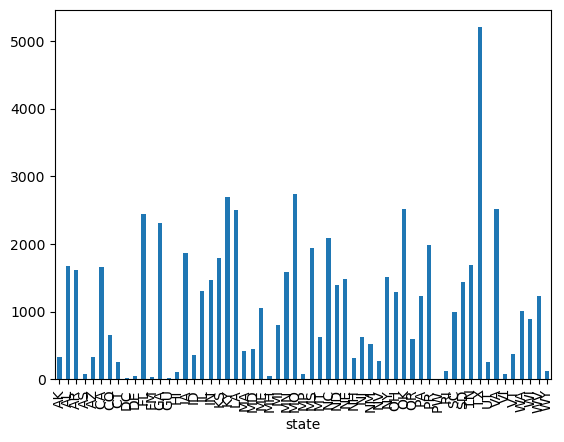

In [16]:
# Default bar chart of total disasters grouped by state
disasterDeclarationSummariesDataFrame.groupby('state')['disasterNumber'].count().plot(kind='bar',)

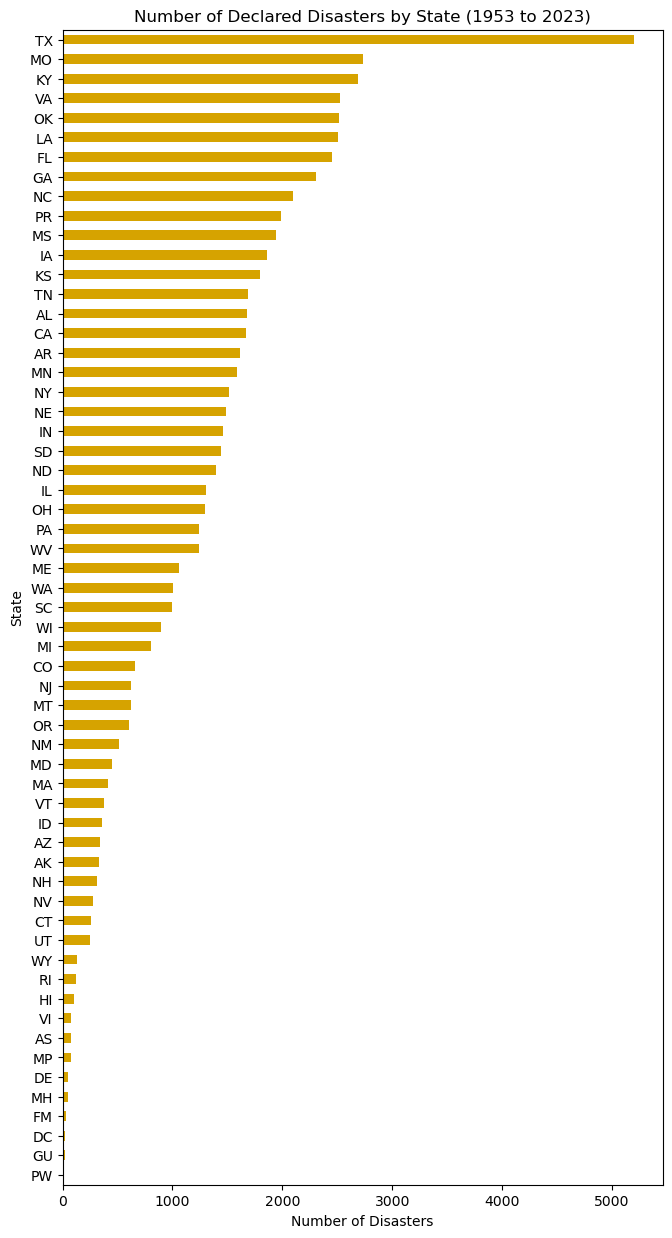

In [17]:
#Formats chart for better analysis
# Sort the data from largest to smallest
sorted_data = disasterDeclarationSummariesDataFrame.groupby('state')['disasterNumber'].count().sort_values(ascending=True)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10,15))

# Plot the sorted data as a horizontal bar chart
sorted_data.plot(kind='barh', ax=ax, color='#D6A300')

# Set the x-axis label
ax.set_xlabel('Number of Disasters')

# Set the y-axis label (optional)
ax.set_ylabel('State')

# Set the title
ax.set_title('Number of Declared Disasters by State (1953 to 2023)')

# Rotates the y-axis labels for better visibility
plt.subplots_adjust(left=0.3)  

# Show the plot
plt.show()

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2005
 2008 2010 2024 2009 2007 2004 2003 2002 2001 1999 2006 2000 1998 1996
 1995 1994 1993 1992 1987 1984 1983 1982 1980 1979 1978 1977 1976 1975
 1974 1997 1991 1990 1989 1988 1986 1985 1981 1973 1971 1970 1972 1969
 1968 1967 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955
 1954 1953]
[ 4  8  9  7  3 12 10  6 11  5  2  1]


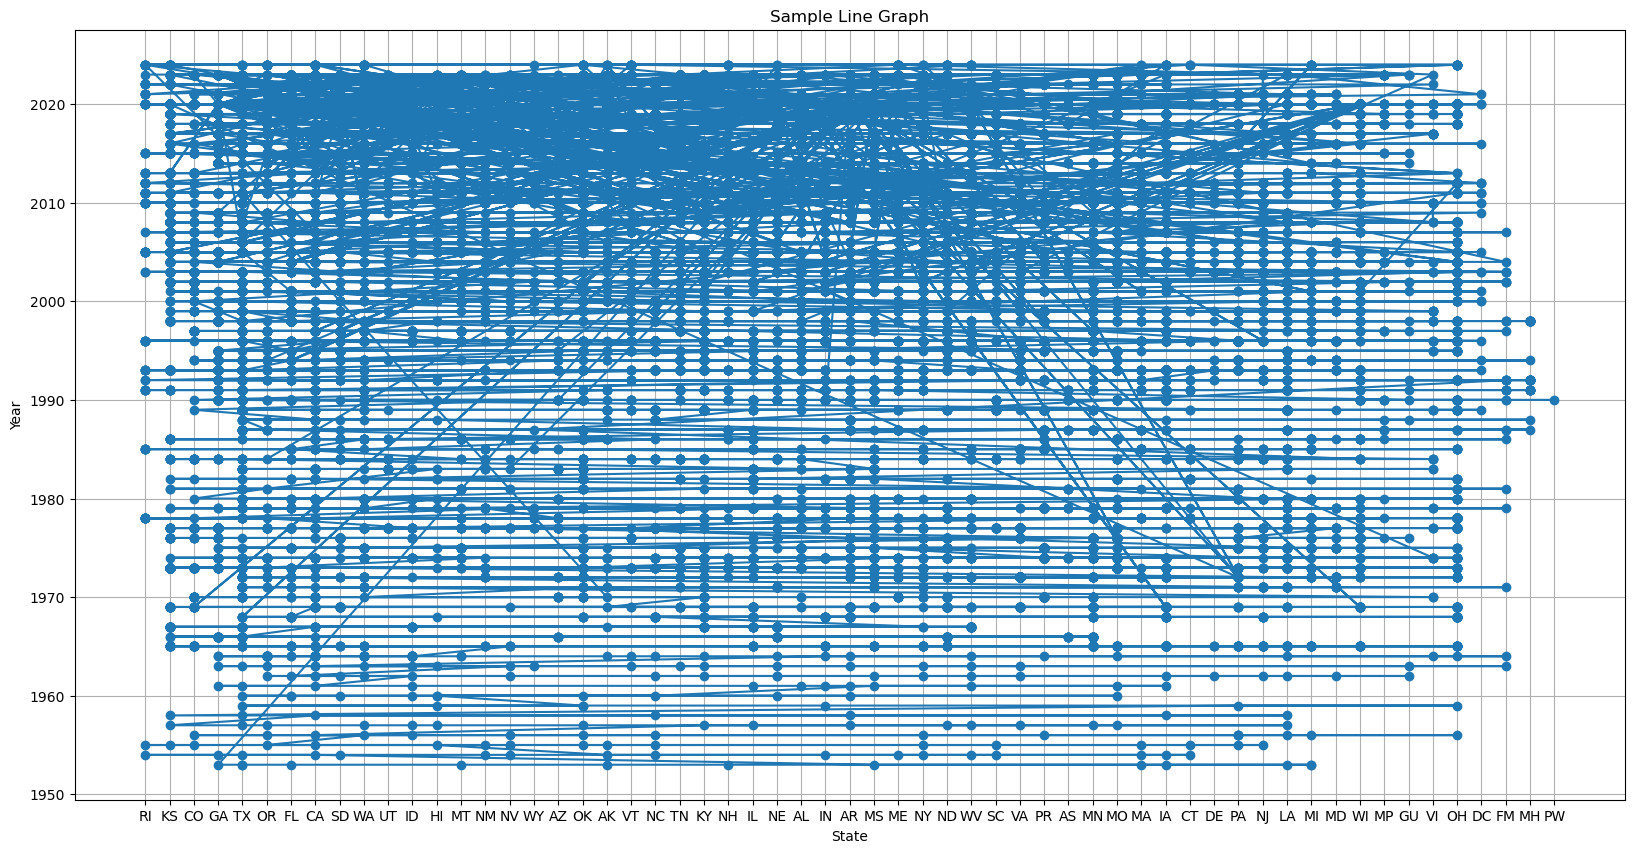

In [18]:
#disasterDF.plot(kind='scatter',x='state',y='declarationDate',subplots=True,figsize=(200,300))

#disasterDF['year']=

disasterDeclarationSummariesDataFrame['Date'] = pd.to_datetime(disasterDeclarationSummariesDataFrame['declarationDate'])
disasterDeclarationSummariesDataFrame['Year']= disasterDeclarationSummariesDataFrame['Date'].dt.year
disasterDeclarationSummariesDataFrame['Month']= disasterDeclarationSummariesDataFrame['Date'].dt.month

print(disasterDeclarationSummariesDataFrame['Year'].unique())
print(disasterDeclarationSummariesDataFrame['Month'].unique())

#disasterDF.plot(x='state',y='Year',kind='scatter',figsize=(75,25))

plt.figure(figsize=(20, 10))
plt.plot(disasterDeclarationSummariesDataFrame['state'], disasterDeclarationSummariesDataFrame['Year'], marker='o', linestyle='-')
plt.title('Sample Line Graph')
plt.xlabel('State')
plt.ylabel('Year')
plt.grid(True)
plt.show()

# Seaborn Charts

# Area , Population , Disasters , Economic Elements & Health

In [19]:
# counts null values by attribute in data set
disasterDeclarationSummariesDataFrame.isnull().sum()

femaDeclarationString           0
disasterNumber                  0
state                           0
declarationType                 0
declarationDate                 0
fyDeclared                      0
incidentType                    0
declarationTitle                0
ihProgramDeclared               0
iaProgramDeclared               0
paProgramDeclared               0
hmProgramDeclared               0
incidentBeginDate               0
incidentEndDate               468
disasterCloseoutDate        14279
tribalRequest                   0
fipsStateCode                   0
fipsCountyCode                  0
placeCode                       0
designatedArea                  0
declarationRequestNumber        0
lastIAFilingDate            47078
lastRefresh                     0
hash                            0
id                              0
Date                            0
Year                            0
Month                           0
dtype: int64

In [20]:
# Removes unneeded columns
finalDataFrame = disasterDeclarationSummariesDataFrame[['disasterNumber','state','placeCode','Year','Date','Month','declarationDate','declarationTitle']]

finalDataFrame.head()

,disasterNumber,state,placeCode,Year,Date,Month,declarationDate,declarationTitle
0,5464,RI,99009,2023,2023-04-14 00:00:00+00:00,4,2023-04-14T00:00:00.000Z,QUEENS RIVER FIRE
1,5463,KS,99201,2023,2023-04-13 00:00:00+00:00,4,2023-04-13T00:00:00.000Z,HADDAM FIRE
2,4731,CO,99009,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
3,4731,CO,99061,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
4,4731,CO,99099,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"


C:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


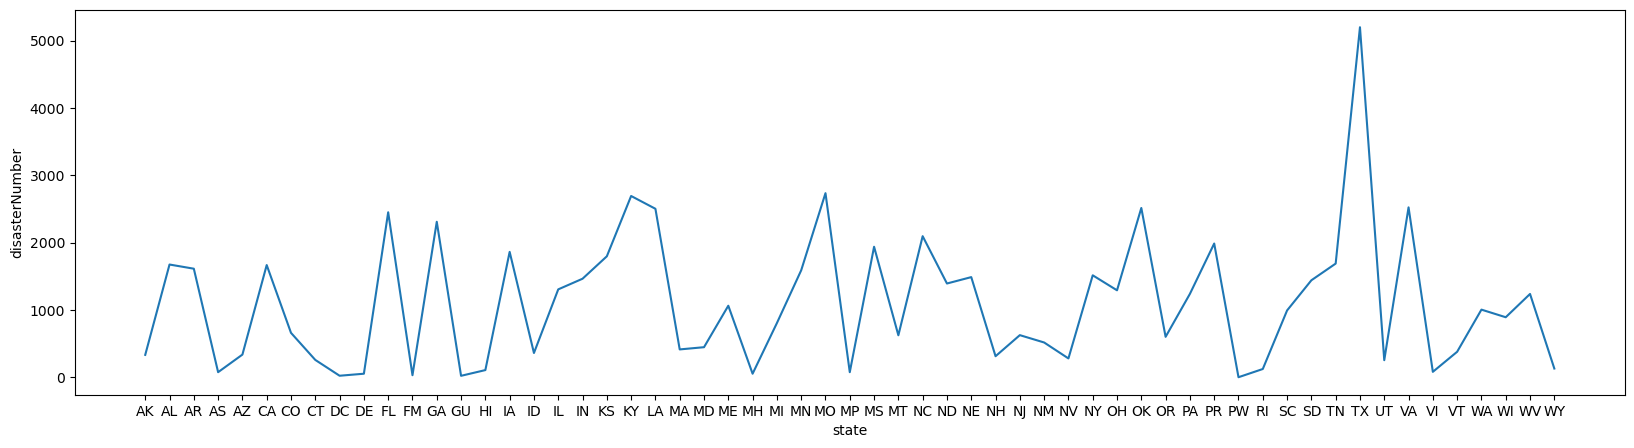

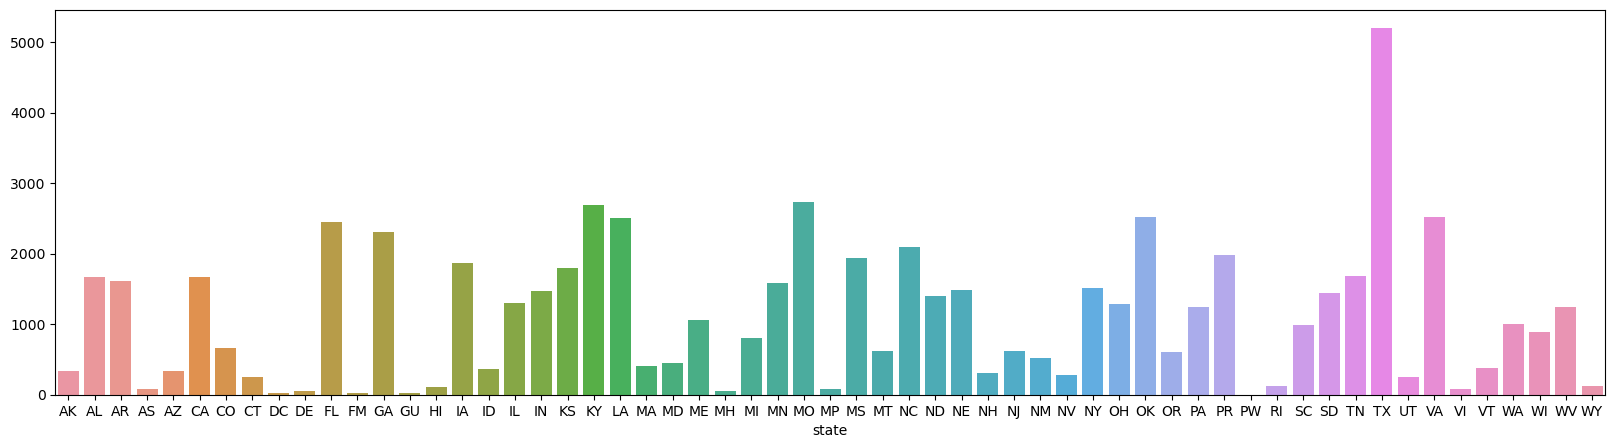

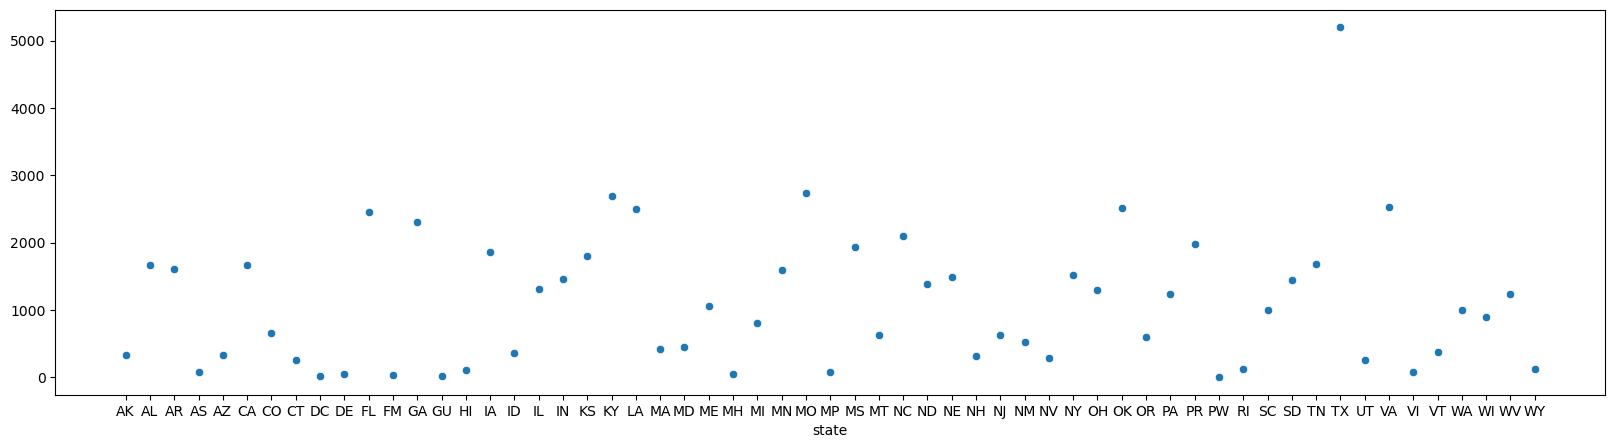

In [21]:
stateGroup = finalDataFrame.groupby('state')['disasterNumber'].count()

plt.figure(figsize=(20,5))
sns.lineplot(data=stateGroup)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x=stateGroup.index, y=stateGroup.values)
plt.show()

# Scatter plot (Requires two series)
plt.figure(figsize=(20,5))
sns.scatterplot(x=stateGroup.index, y=stateGroup.values)
plt.show()

C:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


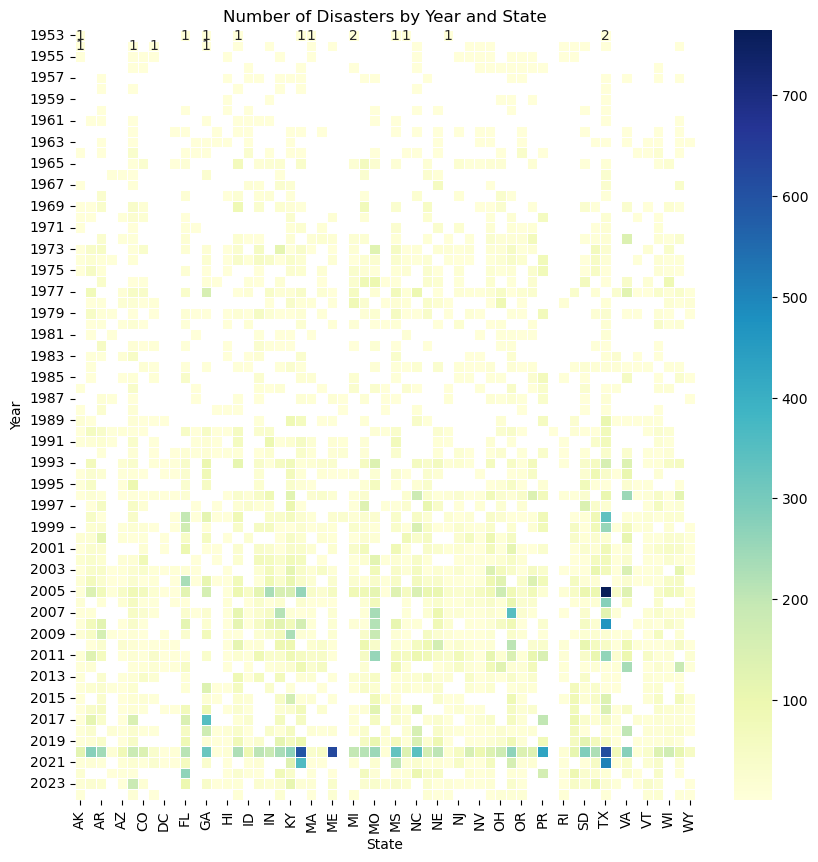

In [22]:
# Pivot the DataFrame to have 'Year' as rows, 'State' as columns, and 'Instances' as values
pivot_df = finalDataFrame.pivot_table(index='Year', columns='state', values='disasterNumber', aggfunc='count')

plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Number of Disasters by Year and State')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

In [23]:
finalDataFrame
finalDisasterSummaryDF=finalDataFrame

finalDisasterSummaryDF.drop(['placeCode'],axis=1,inplace=True)

C:\Users\Jamie\AppData\Local\Temp\ipykernel_63560\3425832548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDisasterSummaryDF.drop(['placeCode'],axis=1,inplace=True)


In [24]:
#finalDisasterSummaryDF.set_index('Year',inplace=True)

display(finalDisasterSummaryDF.head())
finalDisasterSummaryDF= finalDisasterSummaryDF.drop_duplicates(keep='first',ignore_index=True)

display(finalDisasterSummaryDF.head())

,disasterNumber,state,Year,Date,Month,declarationDate,declarationTitle
0,5464,RI,2023,2023-04-14 00:00:00+00:00,4,2023-04-14T00:00:00.000Z,QUEENS RIVER FIRE
1,5463,KS,2023,2023-04-13 00:00:00+00:00,4,2023-04-13T00:00:00.000Z,HADDAM FIRE
2,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
3,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
4,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"


,disasterNumber,state,Year,Date,Month,declarationDate,declarationTitle
0,5464,RI,2023,2023-04-14 00:00:00+00:00,4,2023-04-14T00:00:00.000Z,QUEENS RIVER FIRE
1,5463,KS,2023,2023-04-13 00:00:00+00:00,4,2023-04-13T00:00:00.000Z,HADDAM FIRE
2,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
3,4738,GA,2023,2023-09-07 00:00:00+00:00,9,2023-09-07T00:00:00.000Z,HURRICANE IDALIA
4,5444,TX,2022,2022-07-19 00:00:00+00:00,7,2022-07-19T00:00:00.000Z,CHALK MOUNTAIN FIRE


In [25]:
finalDisasterSummaryDF.shape

(4867, 7)

## FEMA Disaster Assistance Project Dataset (Dataset 2)

### FEMA API Call (Dataset 2)

In [26]:
baseUrlFunding = "https://www.fema.gov/api/open/v1/PublicAssistanceFundedProjectsDetails?"
fundingRecordCount = getRecordCount(baseUrlFunding)
print(fundingRecordCount)
loopNum= math.ceil(fundingRecordCount/top)
print(loopNum)

URL # https://www.fema.gov/api/open/v1/PublicAssistanceFundedProjectsDetails?$inlinecount=allpages&$select=id&$top=1
790406
80


In [27]:
disasterFundingProjectsDataFrame = pd.DataFrame()
disasterFundingProjectsDataFrame = getDelcationSummaryDataFrame(baseUrlFunding, disasterFundingProjectsDataFrame, loopNum, top)
print(" SIZE OF DATAFRAME : ", disasterFundingProjectsDataFrame.shape)
disasterFundingProjectsDataFrame.head()

Success! Number of records #   (10000, 22)
Success! Number of records #   (20000, 22)
Success! Number of records #   (30000, 22)
Success! Number of records #   (40000, 22)
Success! Number of records #   (50000, 22)
Success! Number of records #   (60000, 22)
Success! Number of records #   (70000, 22)
Success! Number of records #   (80000, 22)
Success! Number of records #   (90000, 22)
Success! Number of records #   (100000, 22)
Success! Number of records #   (110000, 22)
Success! Number of records #   (120000, 22)
Success! Number of records #   (130000, 22)
Success! Number of records #   (140000, 22)
Success! Number of records #   (150000, 22)
Success! Number of records #   (160000, 22)
Success! Number of records #   (170000, 22)
Success! Number of records #   (180000, 22)
Success! Number of records #   (190000, 22)
Success! Number of records #   (200000, 22)
Success! Number of records #   (210000, 22)
Success! Number of records #   (220000, 22)
Success! Number of records #   (230000, 2

,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,projectSize,county,countyCode,...,stateNumberCode,projectAmount,federalShareObligated,totalObligated,obligatedDate,dcc,damageCategory,lastRefresh,hash,id
0,4023,2011-09-02T00:00:00.000Z,Hurricane,247,MCMDG00 Trumbull Ave Revetment,009-47500-00,G - Recreational or Other,Large,New Haven,9,...,9,614291.00,614291.00,614291.00,2012-04-05T00:00:00.000Z,G,Recreational or Other,2024-03-23T17:02:09.387Z,5ff26ea21f9af4de5dce40c1f4ab2324b11b5fcb,d247f735-5e5d-4d47-9b4b-58a2fa6396b4
1,4155,2013-11-08T00:00:00.000Z,Severe Storm,173,SG107 - Donated Resources,093-62100-00,B - Protective Measures,Small,Meade,93,...,46,20739.92,16506.90,16506.90,2024-03-22T00:00:00.000Z,B,Protective Measures,2024-03-23T17:02:09.387Z,39a1559d2dd1a04afafdcde601838082c65b4729,39552c91-2dc1-4519-87fb-b6beb815a0ad
2,4226,2015-06-26T00:00:00.000Z,Severe Storm,62,SCT002C - Roads and Culverts,127-99127-00,C - Roads and Bridges,Large,Scott,127,...,5,205754.79,154316.09,154316.09,2015-12-08T00:00:00.000Z,C,Roads and Bridges,2024-03-23T17:02:09.387Z,aef455b4030e92d3c7219138d3456fcebdd789bf,d02b7bb6-fb6c-4fb4-a029-58fdfc9848f9
3,4314,2017-05-22T00:00:00.000Z,Severe Storm,14,DUARW01 - PAAP Debris Removal 1-30 Days,051-20500-00,A - Debris Removal,Large,Holmes,51,...,28,2115399.61,1687334.81,1687334.81,2017-07-21T00:00:00.000Z,A,Debris Removal,2024-03-23T17:02:09.387Z,727e5a2e3628d483b2ac6407f48663a3a69a144e,044e88f1-b38e-483c-b579-80a60c6a10fa
4,4339,2017-09-20T00:00:00.000Z,Hurricane,1677,65671 - [Butterfly] 65671 - MHAT015-THREE BASE...,065-99065-00,G - Recreational or Other,Large,Hatillo,65,...,72,464876.74,418389.07,418389.07,2020-10-02T00:00:00.000Z,G,Recreational or Other,2024-03-23T17:02:09.387Z,6adc5156ac8bbabfa757b5f28fb33dbdb563e7ab,f4ca4173-6991-418e-894c-61ba6943c363


### Dataset 2 Exploration

In [28]:
disasterFundingProjectsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   disasterNumber         792938 non-null  int64  
 1   declarationDate        792938 non-null  object 
 2   incidentType           792938 non-null  object 
 3   pwNumber               792938 non-null  int64  
 4   applicationTitle       786717 non-null  object 
 5   applicantId            792938 non-null  object 
 6   damageCategoryCode     792938 non-null  object 
 7   projectSize            792938 non-null  object 
 8   county                 779930 non-null  object 
 9   countyCode             779930 non-null  object 
 10  state                  792938 non-null  object 
 11  stateCode              792938 non-null  object 
 12  stateNumberCode        792938 non-null  object 
 13  projectAmount          792938 non-null  float64
 14  federalShareObligated  792938 non-null  flo

In [29]:
disasterFundingProjectsDataFrame.isna().sum()

disasterNumber               0
declarationDate              0
incidentType                 0
pwNumber                     0
applicationTitle          6221
applicantId                  0
damageCategoryCode           0
projectSize                  0
county                   13008
countyCode               13008
state                        0
stateCode                    0
stateNumberCode              0
projectAmount                0
federalShareObligated        0
totalObligated               0
obligatedDate                0
dcc                          0
damageCategory               0
lastRefresh                  0
hash                         0
id                           0
dtype: int64

### Dataset 2 Transformation

In [30]:
#Removes nonmaterial columns
finalFundingDF=disasterFundingProjectsDataFrame[['disasterNumber','declarationDate','stateCode','state','projectSize','projectAmount','federalShareObligated']]

print(len(finalFundingDF['disasterNumber'].unique()))
print(finalDisasterSummaryDF['disasterNumber'].unique())

1628
[5464 5463 4731 ... 1087 1085 1008]


## Data Aggregation (Combined FEMA Disaster and Funding Data)

In [31]:
# Merges disaster declaration data (dataset 1) and Disaster Project Assistance data (dataset 2) into single dataframe
disasterSummaryAndFunding_DF=pd.merge(finalDisasterSummaryDF,finalFundingDF,on='disasterNumber',how='inner')

In [32]:
# Converts project amount from 1 USD to billion USD
disasterSummaryAndFunding_DF['projectAmountInBillions']=disasterSummaryAndFunding_DF['projectAmount']/1e9
disasterSummaryAndFunding_DF.shape

(792938, 14)

In [33]:
disasterSummaryAndFunding_DF.head()

,disasterNumber,state_x,Year,Date,Month,declarationDate_x,declarationTitle,declarationDate_y,stateCode,state_y,projectSize,projectAmount,federalShareObligated,projectAmountInBillions
0,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,415061.98,311296.48,0.000415
1,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,50000.00,37500.00,0.000050
2,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,445312.65,333984.49,0.000445
3,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,167922.52,125941.89,0.000168
4,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,92551.08,69413.31,0.000093


In [34]:
finalDisasterSummaryDF.head()

,disasterNumber,state,Year,Date,Month,declarationDate,declarationTitle
0,5464,RI,2023,2023-04-14 00:00:00+00:00,4,2023-04-14T00:00:00.000Z,QUEENS RIVER FIRE
1,5463,KS,2023,2023-04-13 00:00:00+00:00,4,2023-04-13T00:00:00.000Z,HADDAM FIRE
2,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
3,4738,GA,2023,2023-09-07 00:00:00+00:00,9,2023-09-07T00:00:00.000Z,HURRICANE IDALIA
4,5444,TX,2022,2022-07-19 00:00:00+00:00,7,2022-07-19T00:00:00.000Z,CHALK MOUNTAIN FIRE


In [35]:
finalFundingDF.head()

,disasterNumber,declarationDate,stateCode,state,projectSize,projectAmount,federalShareObligated
0,4023,2011-09-02T00:00:00.000Z,CT,Connecticut,Large,614291.00,614291.00
1,4155,2013-11-08T00:00:00.000Z,SD,South Dakota,Small,20739.92,16506.90
2,4226,2015-06-26T00:00:00.000Z,AR,Arkansas,Large,205754.79,154316.09
3,4314,2017-05-22T00:00:00.000Z,MS,Mississippi,Large,2115399.61,1687334.81
4,4339,2017-09-20T00:00:00.000Z,PR,Puerto Rico,Large,464876.74,418389.07


In [36]:
#Shows top 20 project records by project amount
topfinalFundingDF = finalFundingDF.sort_values(by='projectAmount', ascending=False).head(20)
topfinalFundingDF

,disasterNumber,declarationDate,stateCode,state,projectSize,projectAmount,federalShareObligated
203,4485,2020-03-25T00:00:00.000Z,TX,Texas,Large,9.053782e+09,9.053782e+09
9472,4339,2017-09-20T00:00:00.000Z,PR,Puerto Rico,Large,6.082366e+09,5.474129e+09
6804,4339,2017-09-20T00:00:00.000Z,PR,Puerto Rico,Large,2.476341e+09,2.228707e+09
2477,4480,2020-03-20T00:00:00.000Z,NY,New York,Large,1.691034e+09,1.691034e+09
925,4339,2017-09-20T00:00:00.000Z,PR,Puerto Rico,Large,1.506190e+09,1.355571e+09
181,4339,2017-09-20T00:00:00.000Z,PR,Puerto Rico,Large,1.438826e+09,1.294943e+09
2834,1603,2005-08-29T00:00:00.000Z,LA,Louisiana,Large,1.399420e+09,1.399420e+09
2971,4085,2012-10-30T00:00:00.000Z,NY,New York,Large,1.381832e+09,1.243648e+09
208,4485,2020-03-25T00:00:00.000Z,TX,Texas,Large,1.313498e+09,1.313498e+09
1531,1603,2005-08-29T00:00:00.000Z,LA,Louisiana,Large,1.302559e+09,1.302559e+09


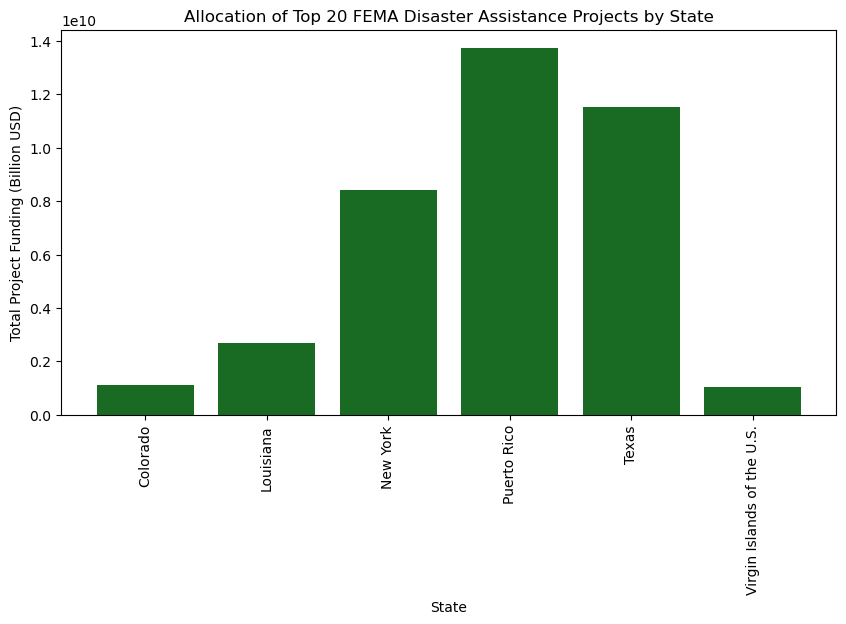

In [37]:
# Group the data by state and sum the project amounts
projects_by_state = topfinalFundingDF.groupby('state')['projectAmount'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(projects_by_state['state'], projects_by_state['projectAmount'], color='#196B24')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Project Funding (Billion USD)')
plt.title('Allocation of Top 20 FEMA Disaster Assistance Projects by State')
plt.show()

In [38]:
# Group the data by state and sum the project amounts
projects_by_disaster= topfinalFundingDF.groupby('disasterNumber')['projectAmount'].sum().reset_index()
projects_by_disaster
# Create a bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(projects_by_state['state'], projects_by_state['projectAmount'], color='#196B24')
# plt.xticks(rotation=90)
# plt.xlabel('State')
# plt.ylabel('Total Project Funding (Billion USD)')
# plt.title('Allocation of Top 20 FEMA Disaster Assistance Projects by State')
# plt.show()

,disasterNumber,projectAmount
0,1391,9.999000e+08
1,1603,2.701979e+09
2,4085,2.470084e+09
3,4339,1.373329e+10
4,4340,1.031963e+09
5,4480,4.959797e+09
6,4485,1.151205e+10
7,4498,1.097972e+09


In [39]:
fundingBySateAndYear = disasterSummaryAndFunding_DF.groupby(by=['Year','stateCode'])['projectAmountInBillions'].sum()


In [40]:
fundingBySateAndYear_DF=pd.DataFrame(fundingBySateAndYear)
display(fundingBySateAndYear_DF)

projectAmountInBillions
Year stateCode                         
1998 PR                        0.445930
     TX                        0.053583
1999 AL                        0.007332
     AR                        0.009190
     CA                        0.067344
...                                 ...
2023 WA                        0.005855
     WY                        0.001042
2024 ND                        0.000038
     NH                        0.000177
     WA                        0.000992

[908 rows x 1 columns]

### Data Visualization (Combined FEMA Dataset)

C:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jamie\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

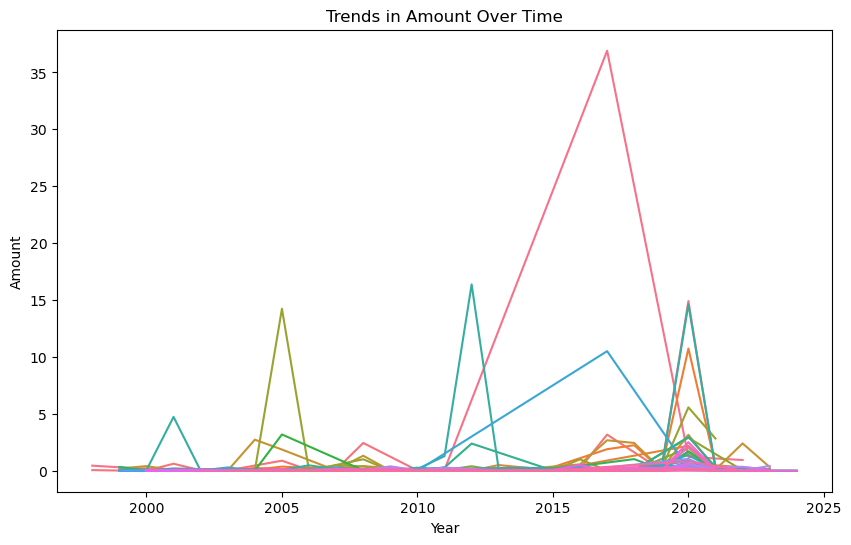

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=fundingBySateAndYear_DF, x='Year', y='projectAmountInBillions', hue='stateCode',legend=False)
plt.title('Trends in Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [42]:
fundingBySateAndYear_DF

projectAmountInBillions
Year stateCode                         
1998 PR                        0.445930
     TX                        0.053583
1999 AL                        0.007332
     AR                        0.009190
     CA                        0.067344
...                                 ...
2023 WA                        0.005855
     WY                        0.001042
2024 ND                        0.000038
     NH                        0.000177
     WA                        0.000992

[908 rows x 1 columns]

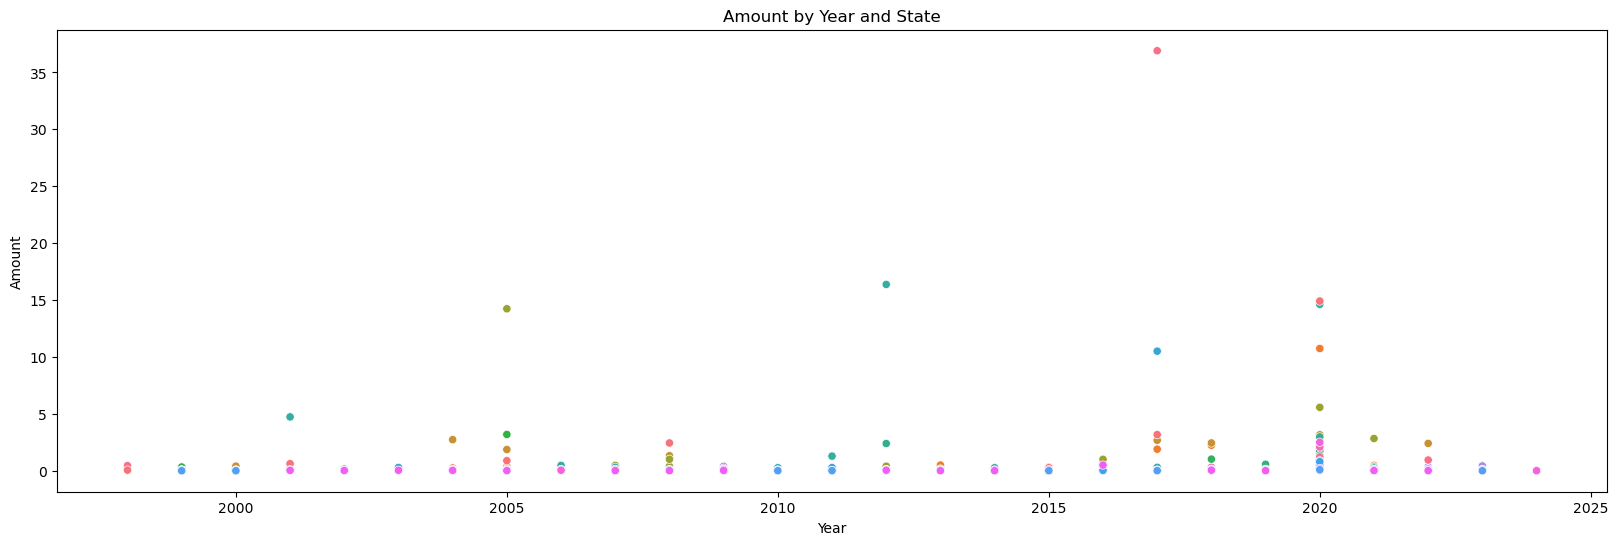

In [43]:
# Bar Plot
plt.figure(figsize=(20, 6))

sns.scatterplot(data=fundingBySateAndYear_DF, x='Year', y='projectAmountInBillions', hue='stateCode', legend=False)
plt.title('Amount by Year and State')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [44]:
disasterSummaryAndFunding_DF.head()

disasterSummaryAndFunding_pivot=disasterSummaryAndFunding_DF.pivot_table(index='Year',columns='stateCode',values='projectAmountInBillions',aggfunc='sum')

<Figure size 6000x1000 with 0 Axes>

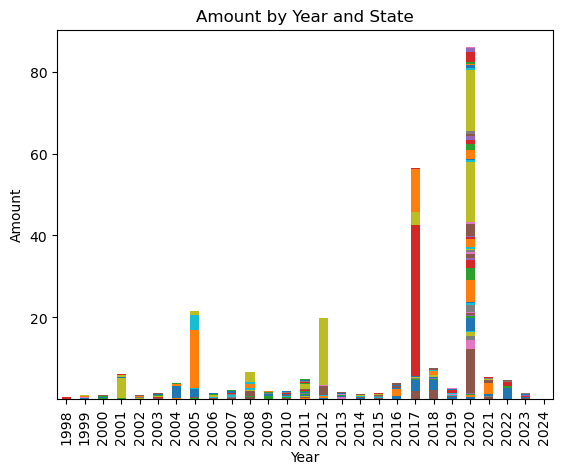

In [45]:
plt.figure(figsize=(60, 10))
disasterSummaryAndFunding_pivot.plot(kind='bar', stacked=True,legend=False)
plt.title('Amount by Year and State')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [46]:
disasterSummaryAndFunding_pivot

stateCode,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.053583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,0.007332,0.009190,NaN,NaN,0.067344,0.006730,0.002382,NaN,0.004333,...,0.039366,0.014800,0.000656,0.025767,0.005229,0.001271,NaN,0.005159,NaN,0.000915
2000,0.013925,0.005710,0.206302,NaN,0.007223,NaN,NaN,NaN,0.002098,NaN,...,0.004722,0.004844,NaN,0.017662,NaN,0.003150,NaN,0.013924,0.006622,0.000864
2001,NaN,0.009119,0.003852,NaN,NaN,NaN,0.005932,NaN,0.000902,NaN,...,0.004726,0.614672,NaN,0.014403,NaN,0.002559,0.086975,0.032225,0.036140,NaN
2002,0.039452,0.019863,0.002829,NaN,0.001590,NaN,NaN,NaN,NaN,NaN,...,0.013936,0.036061,NaN,0.016711,NaN,0.002276,NaN,0.007283,0.019840,NaN
2003,0.002438,0.016183,0.019165,0.001610,0.006927,0.141791,0.007830,0.011427,0.008647,0.018709,...,0.104675,0.029047,NaN,0.286386,0.002028,0.001223,0.011792,NaN,0.040830,NaN
2004,0.016114,0.240795,0.013289,0.013210,NaN,0.090199,NaN,0.012192,NaN,0.001059,...,0.007734,NaN,NaN,0.027138,0.002175,0.002984,NaN,0.013915,0.032993,NaN
2005,0.004989,0.139617,0.044511,0.006117,0.026305,0.360237,0.012996,0.021344,0.001856,0.000090,...,0.034397,0.881828,0.013310,0.000264,NaN,NaN,0.001675,0.001188,0.012174,NaN
2006,0.029074,NaN,0.002920,NaN,0.014224,0.247629,NaN,0.012720,NaN,0.000675,...,0.016082,0.053869,NaN,0.058250,NaN,NaN,0.046556,NaN,NaN,NaN


In [47]:
#Top project amount by state in 2017
disasterSummaryAndFunding_pivot.loc[2017].sort_values(ascending=False)

stateCode
PR    36.907718
VI    10.505982
TX     3.172740
FL     2.674331
CA     1.891796
OK     0.297899
GA     0.198006
KS     0.109326
MO     0.103771
NY     0.072004
MS     0.048042
SC     0.043240
WA     0.041819
TN     0.041251
AR     0.036258
NV     0.032814
ID     0.032047
NE     0.023521
AL     0.021605
OR     0.020968
WV     0.016204
NM     0.016019
VT     0.015750
LA     0.015651
AK     0.013497
SD     0.013054
WI     0.011566
NH     0.011554
WY     0.009394
IA     0.007107
ND     0.007030
UT     0.004135
AS          NaN
AZ          NaN
CO          NaN
CT          NaN
DC          NaN
DE          NaN
FM          NaN
GU          NaN
HI          NaN
IL          NaN
IN          NaN
KY          NaN
MA          NaN
MD          NaN
ME          NaN
MI          NaN
MN          NaN
MP          NaN
MT          NaN
NC          NaN
NJ          NaN
OH          NaN
PA          NaN
RI          NaN
VA          NaN
Name: 2017, dtype: float64

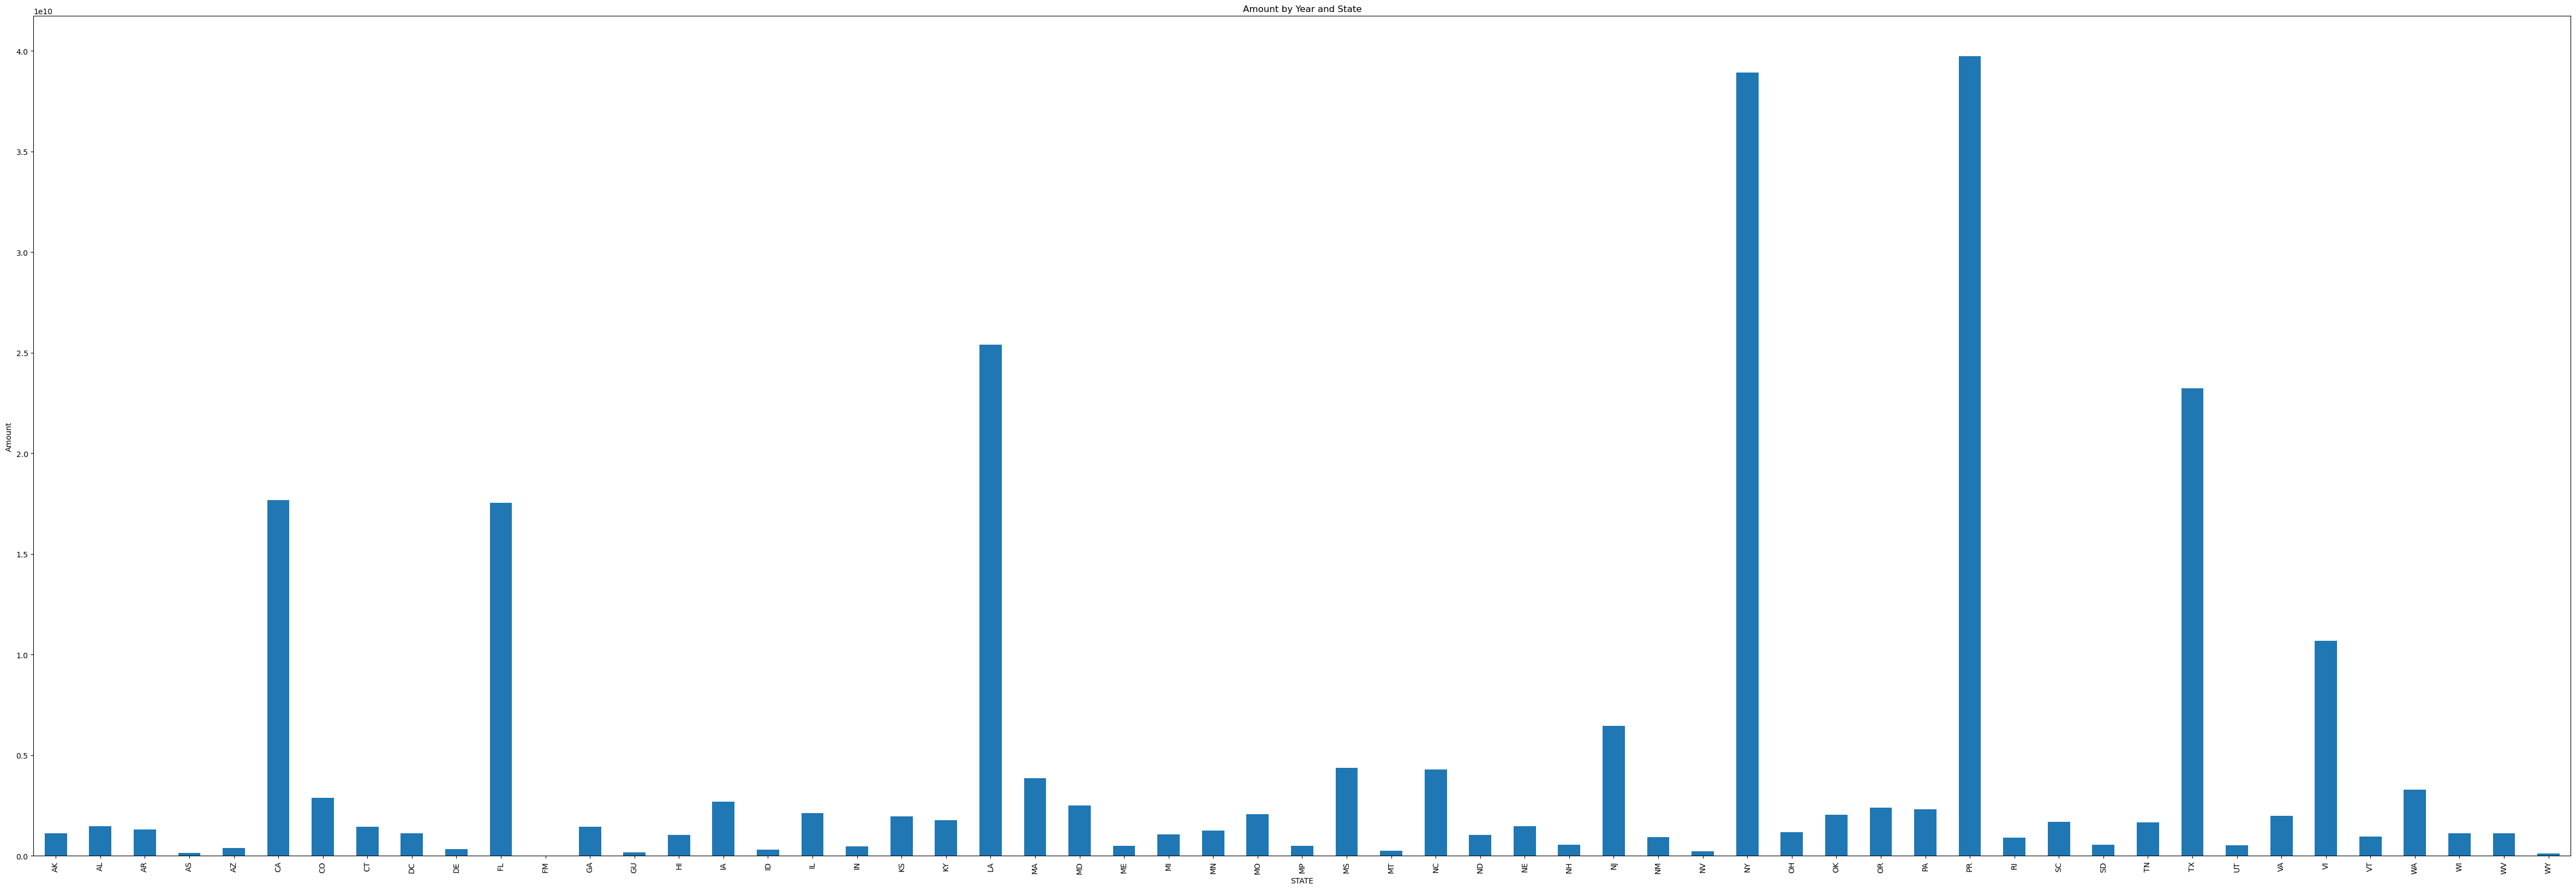

In [48]:
disasterSummaryAndFunding_DF.head()

fundingByState_pivot=disasterSummaryAndFunding_DF.groupby(by='stateCode')['projectAmount'].sum()

plt.figure(figsize=(60, 20))
fundingByState_pivot.plot(kind='bar', stacked=True,legend=False)
plt.title('Amount by Year and State')
plt.xlabel('STATE')
plt.ylabel('Amount')
plt.show()


In [49]:
# Data Frame contains Disater Summary and Project Funding.
disasterSummaryAndFunding_DF.head(5)

,disasterNumber,state_x,Year,Date,Month,declarationDate_x,declarationTitle,declarationDate_y,stateCode,state_y,projectSize,projectAmount,federalShareObligated,projectAmountInBillions
0,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,415061.98,311296.48,0.000415
1,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,50000.00,37500.00,0.000050
2,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,445312.65,333984.49,0.000445
3,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,167922.52,125941.89,0.000168
4,4731,CO,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES",2023-08-25T00:00:00.000Z,CO,Colorado,Small,92551.08,69413.31,0.000093


# CDC DATA ANALYSIS

### Ingest CDC Outbreak Dataset (Dataset 3)

In [52]:
outbreakfilename = 'Resources/NationalOutbreakPublicDataToolFull.xlsx'

In [61]:
outbreakDataFrame = pd.read_excel('Resources/NationalOutbreakPublicDataToolFull.xlsx')
outbreakDataFrame.head(5)

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
0,2009,1,Minnesota,Person-to-person,Norovirus Genogroup II,unknown,Confirmed,Hotel/motel,21,0.0,...,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,Minnesota,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,Minnesota,Person-to-person,Norovirus,NaN,Suspected,"Other, specify",50,0.0,...,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,1,Minnesota,Person-to-person,Norovirus unknown,NaN,Confirmed,Restaurant,24,0.0,...,0.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,NaN,16,0.0,...,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
outbreakDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59736 entries, 0 to 59735
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          59736 non-null  int64  
 1   Month                         59736 non-null  int64  
 2   State                         59736 non-null  object 
 3   Primary Mode                  59736 non-null  object 
 4   Etiology                      44622 non-null  object 
 5   Serotype or Genotype          14871 non-null  object 
 6   Etiology Status               44622 non-null  object 
 7   Setting                       53978 non-null  object 
 8   Illnesses                     59736 non-null  int64  
 9   Hospitalizations              51817 non-null  float64
 10  Info on Hospitalizations      41839 non-null  float64
 11  Deaths                        52523 non-null  float64
 12  Info on Deaths                41936 non-null  float64
 13  F

### Ingest CDC Mortality Dataset (Dataset 4)

In [50]:
# Reads all the CDC monthly mortality files, combines them into one, for the purpose of visualizations
mortality_files = ['Mort2018US.PubUse.csv','Mort2019US.PubUse.csv','Mort2020US.PubUse.csv','Mort2021US.PubUse.csv','Mort2022US.PubUse.csv']

mortality5yrsdf = pd.DataFrame()

for infile in mortality_files:
    thisfile = 'Resources/'+infile
    print('loading',thisfile)
    thisdf = pd.read_csv(thisfile)
    mortality5yrsdf = pd.concat([mortality5yrsdf,thisdf])

print('loaded',len(mortality5yrsdf),'months of mortality data.')

mortality5yrsdf.drop('Unnamed: 0',axis=1,inplace=True)
mortality5yrsdf


loading Resources/Mort2018US.PubUse.csv
loading Resources/Mort2019US.PubUse.csv
loading Resources/Mort2020US.PubUse.csv
loading Resources/Mort2021US.PubUse.csv
loading Resources/Mort2022US.PubUse.csv
loaded 60 months of mortality data.


,year,month,deaths,cause_cataclysm,cause_heart,cause_stroke
0,2018,1,287473,0,0,7
1,2018,2,237565,5,1,3
2,2018,3,249406,6,2,4
3,2018,4,233686,3,0,4
4,2018,5,229307,4,2,3
5,2018,6,220706,9,3,5
6,2018,7,225718,21,1,7
7,2018,8,224873,7,1,9
8,2018,9,219256,28,0,7
9,2018,10,234463,26,1,4


In [51]:
mortality5yrsdf['date'] = pd.to_datetime(dict(year=mortality5yrsdf['year'], month=mortality5yrsdf['month'], day=1))
mortality5yrsdf.set_index('date',inplace=True)
mortality5yrsdf

,year,month,deaths,cause_cataclysm,cause_heart,cause_stroke
date,,,,,,
2018-01-01,2018,1,287473,0,0,7
2018-02-01,2018,2,237565,5,1,3
2018-03-01,2018,3,249406,6,2,4
2018-04-01,2018,4,233686,3,0,4
2018-05-01,2018,5,229307,4,2,3
2018-06-01,2018,6,220706,9,3,5
2018-07-01,2018,7,225718,21,1,7
2018-08-01,2018,8,224873,7,1,9
2018-09-01,2018,9,219256,28,0,7


In [ ]:
# Merge the datasets and design graphs
# FEMA Disaster Summary ,  FEMA Disaster Relief Project Funds ,CDC Mortality Rate,  CDC Outbreak data
disasterSummaryAndFunding_DF
mortality5yrsdf
outbreakDataFrame

display(disasterSummaryAndFunding_DF.head())
display(mortality5yrsdf.head())
display(outbreakDataFrame.head())

In [109]:
# Size and Min / Max Years 
print( "Disaster Summary and Funding Dataframe") 
print("-"*50)
print("Size # ", disasterSummaryAndFunding_DF.shape)
print("Date Range #", disasterSummaryAndFunding_DF['Year'].min() , disasterSummaryAndFunding_DF['Year'].max())
print("Data States #", len(disasterSummaryAndFunding_DF['stateCode'].unique()))
print("_"*50)

print( "Mortality Summary ") 
print("-"*50)
print("Size # ", mortality5yrsdf.shape)
print("Date Range #", mortality5yrsdf['year'].min() , mortality5yrsdf['year'].max())
#print("Data States #", len(mortality5yrsdf['stateCode'].unique()))
print("_"*50)

print( "Outbreak Summary") 
print("-"*50)
print("Size # ", outbreakDataFrame.shape)
print("Date Range #", outbreakDataFrame['Year'].min() , disasterSummaryAndFunding_DF['Year'].max())
print("Data States #", len(outbreakDataFrame['State'].unique()))
print("_"*50)


Disaster Summary and Funding Dataframe
--------------------------------------------------
Size #  (792938, 14)
Date Range # 1998 2024
Data States # 57
__________________________________________________
Mortality Summary 
--------------------------------------------------
Size #  (60, 6)
Date Range # 2018 2022
__________________________________________________
Outbreak Summary
--------------------------------------------------
Size #  (59736, 21)
Date Range # 1971 2024
Data States # 58
__________________________________________________


In [64]:
disasterSummaryAndFunding_DF.rename(columns={'state_y':'State'},inplace=True)
display(disasterSummaryAndFunding_DF.columns)

display(mortality5yrsdf.columns)

display(outbreakDataFrame.columns)

Index(['disasterNumber', 'state_x', 'Year', 'Date', 'Month',
       'declarationDate_x', 'declarationTitle', 'declarationDate_y',
       'stateCode', 'State', 'projectSize', 'projectAmount',
       'federalShareObligated', 'projectAmountInBillions'],
      dtype='object')

Index(['year', 'month', 'deaths', 'cause_cataclysm', 'cause_heart',
       'cause_stroke'],
      dtype='object')

Index(['Year', 'Month', 'State', 'Primary Mode', 'Etiology',
       'Serotype or Genotype', 'Etiology Status', 'Setting', 'Illnesses',
       'Hospitalizations', 'Info on Hospitalizations', 'Deaths',
       'Info on Deaths', 'Food Vehicle', 'Food Contaminated Ingredient',
       'IFSAC Category', 'Water Exposure', 'Water Type', 'Animal Type',
       'Animal Type Specify', 'Water Status'],
      dtype='object')

In [65]:
display(disasterSummaryAndFunding_DF['Year'].unique())
display(disasterSummaryAndFunding_DF['State'].unique())
display(disasterSummaryAndFunding_DF['Month'].unique())

display(outbreakDataFrame['Year'].unique())
display(outbreakDataFrame['State'].unique())
display(outbreakDataFrame['Month'].unique())


array([2023, 2020, 2022, 2013, 2021, 2016, 2011, 2005, 2018, 2015, 2008,
       2017, 2012, 2010, 2009, 2007, 2004, 2003, 2002, 2001, 1999, 2006,
       2000, 2024, 2014, 2019, 1998])

array(['Colorado', 'Georgia', 'Vermont', 'Montana', 'Illinois',
       'California', 'Tennessee', 'Texas', 'Kentucky', 'Alabama',
       'Florida', 'Nevada', 'Oklahoma', 'Indiana', 'Arkansas',
       'Mississippi', 'Maine', 'New York', 'New Hampshire',
       'South Dakota', 'North Dakota', 'Washington', 'Arizona',
       'West Virginia', 'South Carolina', 'Virginia', 'Alaska',
       'Puerto Rico', 'American Samoa', 'Minnesota', 'Missouri',
       'Nebraska', 'Kansas', 'Rhode Island', 'New Mexico',
       'Massachusetts', 'Iowa', 'Hawaii', 'Connecticut', 'Delaware',
       'Pennsylvania', 'North Carolina', 'New Jersey', 'Louisiana',
       'Michigan', 'Oregon', 'Idaho', 'Maryland', 'Utah', 'Wisconsin',
       'Wyoming', 'Virgin Islands of the U.S.', 'Ohio', 'Guam',
       'District of Columbia', 'Northern Mariana Islands',
       'Federated States of Micronesia'], dtype=object)

array([ 8,  9, 10,  7,  5,  4,  3,  2,  1, 12,  6, 11])

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2005, 2004, 1999, 1998,
       2000, 2001, 2002, 2003, 2006, 2007, 2008, 2016, 2017, 2018, 2019,
       2020, 1971, 1972, 1973, 1974, 1976, 1980, 1982, 1984, 1986, 1989,
       1990, 1992, 1993, 1995, 1979, 1975, 1985, 1997, 1981, 1983, 1987,
       1977, 1978, 1988, 1991, 1996, 1994, 2021], dtype=int64)

array(['Minnesota', 'Pennsylvania', 'Alaska', 'Alabama', 'Illinois',
       'Iowa', 'Montana', 'Louisiana', 'Tennessee', 'New York',
       'Massachusetts', 'Ohio', 'Maine', 'Arkansas', 'Michigan',
       'Florida', 'Wyoming', 'Hawaii', 'Wisconsin', 'New Hampshire',
       'Missouri', 'Idaho', 'Connecticut', 'California', 'Oklahoma',
       'Virginia', 'South Carolina', 'Oregon', 'New Jersey',
       'Mississippi', 'Arizona', 'Maryland', 'Kansas', 'Colorado',
       'Washington', 'Georgia', 'New Mexico', 'Utah', 'North Carolina',
       'Indiana', 'Nevada', 'North Dakota', 'South Dakota',
       'West Virginia', 'Vermont', 'Texas', 'Rhode Island', 'Puerto Rico',
       'Kentucky', 'Washington DC', 'Multistate', 'Delaware', 'Nebraska',
       'Republic of Palau', 'Guam',
       'Commonwealth of the Northern Mariana Islands',
       'US Virgin Islands', 'Republic of the Marshall Islands'],
      dtype=object)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [66]:
disasterSummary_Funding_Outbreak_DF = pd.merge(disasterSummaryAndFunding_DF,outbreakDataFrame,how='inner',on=['Year','Month','State'])

In [67]:
disasterSummary_Funding_Outbreak_DF.dropna(axis=0)

summaryData = disasterSummary_Funding_Outbreak_DF.loc[disasterSummary_Funding_Outbreak_DF['Year']>=2018]

summaryData.columns

Index(['disasterNumber', 'state_x', 'Year', 'Date', 'Month',
       'declarationDate_x', 'declarationTitle', 'declarationDate_y',
       'stateCode', 'State', 'projectSize', 'projectAmount',
       'federalShareObligated', 'projectAmountInBillions', 'Primary Mode',
       'Etiology', 'Serotype or Genotype', 'Etiology Status', 'Setting',
       'Illnesses', 'Hospitalizations', 'Info on Hospitalizations', 'Deaths',
       'Info on Deaths', 'Food Vehicle', 'Food Contaminated Ingredient',
       'IFSAC Category', 'Water Exposure', 'Water Type', 'Animal Type',
       'Animal Type Specify', 'Water Status'],
      dtype='object')

# Combined Dataset Analysis

In [68]:
finalDataset = summaryData[['disasterNumber','State','Year','Month','declarationTitle','projectAmountInBillions','Hospitalizations','Illnesses','Deaths']]

In [69]:
finalDataset.shape

(430142, 9)

In [71]:
finalDataset.to_csv('DISASTER_ANALYSIS.csv')

In [88]:
finalDataset.describe()

,disasterNumber,Year,Month,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
count,430142.000000,430142.000000,430142.000000,430142.000000,413087.000000,430142.000000,408849.000000
mean,4455.168198,2019.295542,5.035126,0.000811,0.622065,17.412510,0.051794
std,89.018610,0.917577,2.991692,0.029756,2.215684,20.302823,0.278746
min,3442.000000,2018.000000,1.000000,-0.000507,0.000000,2.000000,0.000000
25%,4412.000000,2019.000000,3.000000,0.000012,0.000000,4.000000,0.000000
50%,4461.000000,2019.000000,4.000000,0.000040,0.000000,10.000000,0.000000
75%,4496.000000,2020.000000,8.000000,0.000136,0.000000,23.000000,0.000000
max,4634.000000,2021.000000,12.000000,9.053782,24.000000,215.000000,4.000000


### Relationships Between Max Values (Project Amount, Deaths, Hospitalization, Illness) at Project Level

In [100]:
finalDataset.sort_values(by='projectAmountInBillions', ascending=False).head(5)

,disasterNumber,State,Year,Month,declarationTitle,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
2992833,4485,Texas,2020,3,COVID-19 PANDEMIC,9.053782,0.0,2,0.0
2992834,4485,Texas,2020,3,COVID-19 PANDEMIC,9.053782,0.0,7,0.0
2992831,4485,Texas,2020,3,COVID-19 PANDEMIC,9.053782,0.0,2,0.0
2992832,4485,Texas,2020,3,COVID-19 PANDEMIC,9.053782,0.0,3,0.0
3001383,4480,New York,2020,3,COVID-19 PANDEMIC,1.691034,1.0,38,0.0


In [89]:
finalDataset.sort_values(by='Deaths', ascending=False).head(5)

,disasterNumber,State,Year,Month,declarationTitle,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
598847,4414,Minnesota,2019,2,SEVERE STORMS AND FLOODING,0.000568,NaN,95,4.0
598870,4414,Minnesota,2019,2,SEVERE STORMS AND FLOODING,0.000278,NaN,95,4.0
598893,4414,Minnesota,2019,2,SEVERE STORMS AND FLOODING,0.000916,NaN,95,4.0
598778,4414,Minnesota,2019,2,SEVERE STORMS AND FLOODING,0.000189,NaN,95,4.0
598801,4414,Minnesota,2019,2,SEVERE STORMS AND FLOODING,0.000175,NaN,95,4.0


In [91]:
finalDataset.sort_values(by='Hospitalizations', ascending=False).head(5)

,disasterNumber,State,Year,Month,declarationTitle,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
38263,4559,Louisiana,2020,8,HURRICANE LAURA,0.000802,24.0,58,1.0
38712,4559,Louisiana,2020,8,HURRICANE LAURA,0.000009,24.0,58,1.0
36856,4559,Louisiana,2020,8,HURRICANE LAURA,0.000011,24.0,58,1.0
36800,4559,Louisiana,2020,8,HURRICANE LAURA,0.000011,24.0,58,1.0
37005,4559,Louisiana,2020,8,HURRICANE LAURA,0.000030,24.0,58,1.0


In [92]:
finalDataset.sort_values(by='Illnesses', ascending=False).head(5)

,disasterNumber,State,Year,Month,declarationTitle,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
472490,4474,Vermont,2020,1,SEVERE STORM AND FLOODING,0.000005,NaN,215,0.0
472130,4474,Vermont,2020,1,SEVERE STORM AND FLOODING,0.000031,NaN,215,0.0
472338,4474,Vermont,2020,1,SEVERE STORM AND FLOODING,0.000071,NaN,215,0.0
472030,4474,Vermont,2020,1,SEVERE STORM AND FLOODING,0.000014,NaN,215,0.0
472202,4474,Vermont,2020,1,SEVERE STORM AND FLOODING,0.000006,NaN,215,0.0


### Relationships Between Max Values (Project Amount, Deaths, Hospitalization, Illness) at Disaster Level

In [108]:
# Sorts Disasters by decending Project Amount
finalDataset_disaster = finalDataset.groupby('disasterNumber').sum('projectAmountInBillions')
finalDataset_disaster.sort_values(by='projectAmountInBillions', ascending=False).head(5)

,Year,Month,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
disasterNumber,,,,,,
4496,95412680,141702,63.697937,23617.0,828742,0.0
4485,9720240,14436,59.077417,0.0,16842,0.0
4489,70498000,104700,31.839875,29665.0,760820,0.0
4480,12923960,19194,28.318729,3199.0,131159,0.0
4399,24978804,123780,14.641809,10315.0,43323,4126.0


In [124]:
# Details about Disaster corresponding to max project assistance amount
finalDataset.iloc[4496]

disasterNumber                          4399
State                                Florida
Year                                    2018
Month                                     10
declarationTitle           HURRICANE MICHAEL
projectAmountInBillions             0.009369
Hospitalizations                         3.0
Illnesses                                  3
Deaths                                   2.0
Name: 633354, dtype: object

In [103]:
# Sorts Disasters by decending Death Count
finalDataset_disaster = finalDataset.groupby('disasterNumber').sum('Deaths')
finalDataset_disaster.sort_values(by='Deaths', ascending=False).head(5)

,Year,Month,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
disasterNumber,,,,,,
4399,24978804,123780,14.641809,10315.0,43323,4126.0
4506,23670360,35154,12.253455,3906.0,247380,2604.0
4559,4880320,19328,2.940534,57984.0,140128,2416.0
4416,16680978,16524,1.184018,3672.0,200583,2295.0
4360,46841816,92848,2.365196,19896.0,384656,1658.0


In [125]:
# Details about Disaster corresponding to max death count
finalDataset.iloc[4399]

disasterNumber                                                          4432
State                                                                 Oregon
Year                                                                    2019
Month                                                                      5
declarationTitle           SEVERE WINTER STORMS, FLOODING, LANDSLIDES, AN...
projectAmountInBillions                                             0.009638
Hospitalizations                                                         0.0
Illnesses                                                                 18
Deaths                                                                   0.0
Name: 521105, dtype: object

In [105]:
# Sorts Disasters by decending Hospitalization Count
finalDataset_disaster = finalDataset.groupby('disasterNumber').sum('Hospitalizations')
finalDataset_disaster.sort_values(by='Hospitalizations', ascending=False).head(5)

,Year,Month,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
disasterNumber,,,,,,
4559,4880320,19328,2.940534,57984.0,140128,2416.0
4489,70498000,104700,31.839875,29665.0,760820,0.0
4496,95412680,141702,63.697937,23617.0,828742,0.0
4360,46841816,92848,2.365196,19896.0,384656,1658.0
4399,24978804,123780,14.641809,10315.0,43323,4126.0


In [127]:
# Details about Disaster corresponding to max hospitalization count
finalDataset.iloc[4559]

disasterNumber                          4485
State                                  Texas
Year                                    2020
Month                                      3
declarationTitle           COVID-19 PANDEMIC
projectAmountInBillions               0.0093
Hospitalizations                         0.0
Illnesses                                  2
Deaths                                   0.0
Name: 2995405, dtype: object

In [106]:
# Sorts Disasters by decending Illness Count
finalDataset_disaster = finalDataset.groupby('disasterNumber').sum('Illnesses')
finalDataset_disaster.sort_values(by='Illnesses', ascending=False).head(5)

,Year,Month,projectAmountInBillions,Hospitalizations,Illnesses,Deaths
disasterNumber,,,,,,
4496,95412680,141702,63.697937,23617.0,828742,0.0
4489,70498000,104700,31.839875,29665.0,760820,0.0
4421,47674647,70839,3.764716,5556.0,523653,0.0
4360,46841816,92848,2.365196,19896.0,384656,1658.0
4420,24409710,36270,3.391833,4030.0,372775,0.0


In [126]:
# Details about Disaster corresponding to max illness count
finalDataset.iloc[4496]

disasterNumber                          4399
State                                Florida
Year                                    2018
Month                                     10
declarationTitle           HURRICANE MICHAEL
projectAmountInBillions             0.009369
Hospitalizations                         3.0
Illnesses                                  3
Deaths                                   2.0
Name: 633354, dtype: object